In [15]:
from labtools import assign_trigs_to_clicks, get_trig_len, get_dump, USER, LOC, correlation, shift_channels, get_apds_shifts
import numpy as np
from matplotlib import pyplot as plt
import os

In [16]:
folder = "/home/bbuusshh/my_git/data/fiber"

In [17]:
os.listdir(folder)

['g2_tf_30step_0.dump',
 'g2_tf_30step_2.dump',
 'g2_tf_30step_1.dump',
 'g2_0.dump']

In [58]:
dump_name="g2_tf_30step_2.dump"
data = get_dump(f"{folder}/{dump_name}")
trig = get_trig_len(data)
data = assign_trigs_to_clicks(data, trig=trig, channels=[1,2,3,4], return_trig=True)

In [59]:
np.unique(data['channel'])

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

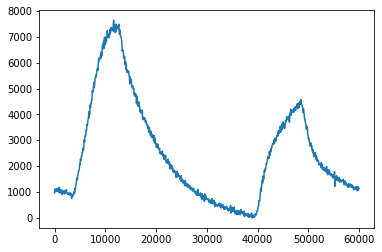

In [60]:
y, x = np.histogram(data['time_from_trig'][data['channel']==ch], bins=1000, range=(0, trig))
plt.plot(x[:-1], y - np.min(y))

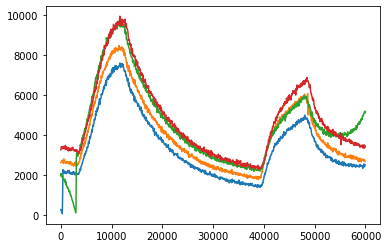

In [61]:
for ch in [1,2,3,4]:
    y, x = np.histogram(data['time_from_trig'][data['channel']==ch], bins=1000, range=(0, trig))
    plt.plot(x[:-1], y)

In [62]:
data2 = data[(data['time_from_trig'] > 0)*(data['time_from_trig'] < 60_000)]

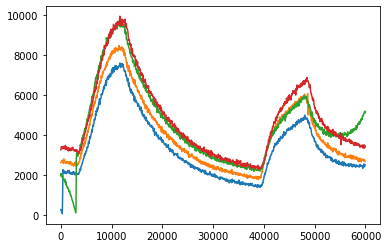

In [63]:
for ch in [1,2,3,4]:
    y, x = np.histogram(data2['time_from_trig'][data2['channel']==ch], bins=1000, range=(0, trig))
    plt.plot(x[:-1], y)

33

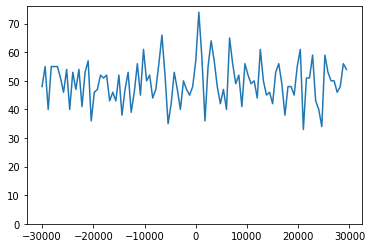

In [64]:
corr_window = 30000
autoc_diffs_tot, autoc_diffs = correlation(data2, 
                                           start_chs=[1,3],
                                           stop_chs=[2,4],
                                           corr_window=corr_window)
a = np.concatenate(autoc_diffs)
y, x = np.histogram(a, bins=100, range=(-corr_window, corr_window))
plt.plot(x[:-1], y)
plt.ylim(0)
np.min(y)

In [11]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [12]:
@interact_manual
def show_articles_more_than(x=(0, 100_000, 10), y=(0, 100_000, 10)):
    fig, axes = plt.subplots(1, 2, sharey=False, gridspec_kw={'wspace': 0.01}, figsize=(10,5))
    data2 = data[(data['time_from_trig'] > x) &(data['time_from_trig'] < y)]
    y, x = np.histogram(data2['time_from_trig'][data2['channel']==1], bins=1000, range=(0, trig))
    axes[0].plot(x[:-1], y, 'r')
    y, x = np.histogram(data2['time_from_trig'][data2['channel']==2], bins=1000, range=(0, trig))
    axes[0].plot(x[:-1], y, 'b')
    y, x = np.histogram(data2['time_from_trig'][data2['channel']==3], bins=1000, range=(0, trig))
    axes[0].plot(x[:-1], y, 'g')
    y, x = np.histogram(data2['time_from_trig'][data2['channel']==4], bins=1000, range=(0, trig))
    axes[0].plot(x[:-1], y, 'k')
    corr_window = 3000000
    autoc_diffs_tot, autoc_diffs = correlation(data2, 
                                               start_chs=[1],
                                               stop_chs=[2],
                                               corr_window=corr_window)
    a = np.concatenate(autoc_diffs)
    y, x = np.histogram(a, bins=400, range=(-corr_window, corr_window))
    axes[1].plot(x[:-1], y)
    axes[1].set_ylim(0)

interactive(children=(IntSlider(value=50000, description='x', max=100000, step=10), IntSlider(value=50000, des…